# Exercise - Validation Metrics for Classification

1. Load the data (train and test data)
2. Fit the Logistic Regression
3. (ASSIGNMENT) Check the accuracy and the AU ROC
4. Visualize the ROC curve
5. Discuss metric results

**NOTE:** Run all cells until the ***TASK 1*** (do not make changes)

By: Hugo Lopes  
Learning Unit 11

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, \
    recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [2]:
def plot_roc_curve(roc_auc, fpr, tpr):
    # Function to plot ROC Curve
    # Inputs: 
    #     roc_auc - AU ROC value (float)
    #     fpr - false positive rate (output of roc_curve()) array
    #     tpr - true positive rate (output of roc_curve()) array
    
    plt.figure(figsize=(8,6))
    lw = 2
    plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (AUROC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Load an example dataset
Data already prepared for a classifier

In [3]:
df = pd.read_csv('../data/exercise_dataset_LU11.csv')
print('Shape:', df.shape)
df.head()

Shape: (10000, 11)


,label,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,0,0.023406,81,0,0.005353,9900.0,9,0,0,0,0.0
1,0,0.872972,55,4,0.558659,2505.0,9,0,1,0,1.0
2,0,0.101390,72,0,0.296188,5455.0,9,0,1,0,0.0
3,0,0.097095,46,0,0.259374,7120.0,10,0,1,0,1.0
4,0,0.295037,52,1,0.295941,5000.0,6,0,1,0,0.0


## Divide into Train and Test sets:
- X_train: train data  
- y_train: target of train data  
- X_test: test data  
- y_test: target of test data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], 
                                                    df.iloc[:, 0], 
                                                    test_size=0.33, 
                                                    random_state=42)

## Task 1: Fit the LogisticRegression() with the Train Set

In [8]:
# Code here:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Task 2: Get the predictions & scores/probas on the Test Set

In [11]:
# Code here:
predicted = lr.predict(X_test)
predictedProba = lr.predict_proba(X_test)
predicted
predictedProba

array([[ 0.90458261,  0.09541739],
       [ 0.94366042,  0.05633958],
       [ 0.93040269,  0.06959731],
       ..., 
       [ 0.87696054,  0.12303946],
       [ 0.95525038,  0.04474962],
       [ 0.94138597,  0.05861403]])

## Task 3: Get the Accuracy score & AU ROC & ROC Curve

In [26]:
# Code here for accuracy score, AU ROC:
accuracy_score(y_test, predicted)
roc_auc=roc_auc_score(y_test, predictedProba[:,1])

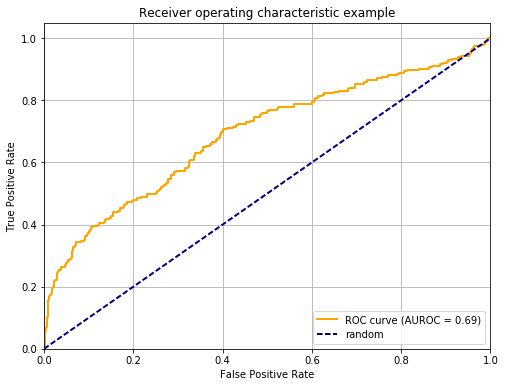

In [21]:
# Code here for ROC curve:
fpr, tpr, thresholds = roc_curve(y_test, predictedProba[:,1])
# Data to compute the ROC curve (FPR and TPR):

# Call plot_roc_curve():
plot_roc_curve(roc_auc,fpr,tpr)

# Task 4: Discuss the results
What do you think about the AU ROC? And what about the accuracy score? Do you think it is high?  
Hint: take a look at the class balance.

In [25]:
confmat = confusion_matrix(y_true=y_test, y_pred=predicted)
confmat

array([[3071,    4],
       [ 221,    4]])

## Temos uma situação em que o data set é unbalanced. Dependendo do quese quer obter no final, podemos querer diminuir o valor de falsos positivos ou diminuir o valor de falsos negativos